In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

Acurácia: 1.0
Precisão: 1.0
Recall: 1.0
F1-score: 1.0


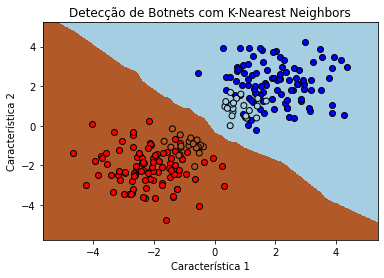

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier# Gerando dados de exemplo
X_normal = np.random.randn(100, 2) + 2
X_botnet = np.random.randn(100, 2) - 2
X = np.concatenate((X_normal, X_botnet))
y = np.concatenate((np.zeros(100), np.ones(100)))

# Dividindo o conjunto de dados em treinamento e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pré-processando os dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criando o modelo KNN
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Treinando o modelo
knn.fit(X_train, y_train)

# Prevendo as classes do conjunto de teste
y_pred = knn.predict(X_test)

# Calculando as métricas de desempenho
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Precisão:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

# Plotando o gráfico de detecção de botnets
h = 0.02  # Tamanho do passo na grade
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))

# Colocando o resultado na cor do gráfico
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')

# Plotando os pontos de dados
plt.scatter(X_normal[:, 0], X_normal[:, 1], c='blue', edgecolors='k', cmap=plt.cm.Paired)
plt.scatter(X_botnet[:, 0], X_botnet[:, 1], c='red', edgecolors='k', cmap=plt.cm.Paired)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, edgecolors='k', cmap=plt.cm.Paired)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Detecção de Botnets com K-Nearest Neighbors")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.show()